In [1]:
from datetime import datetime
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import stor
import sys
from scipy import stats

In [2]:
# create dataframe for each labchip run (both plates run on 192-sample labchip)
# df_plate1 = pd.read_csv('/Users/rchin/Documents/SonicMan Qualification/AN-1873 PQ/2019-10-14_SonicMan1873_PQ_4_WellTable.csv')
df_plate1 = pd.read_csv('/Users/rchin/Documents/SonicMan Qualification/AN-1873 PQ/2019-10-04_SonicMan1873_PQ_2_WellTable.csv')
# df_plate2 = pd.read_csv('/Users/rchin/Documents/SonicMan Qualification/AN-1873 PQ/2019-10-07_SonicMan1873_PQ_3a_WellTable.csv')
df_plate2 = pd.read_csv('/Users/rchin/Documents/SonicMan Qualification/AN-1873 PQ/2020-01-24_AN1873_PQ_5_WellTable.csv')

df_plate1['Plate Name'] = 'Batch_2'
df_plate2['Plate Name'] = 'Batch_5'

#Add column with SonicMan IDs
new_AN = 'AN-1873'
valid_AN = 'AN-433'  #validated walkup sonicman

# split df_plate into new and valid sonicman dataframes with the conditions:
# q1 = new instrument, q2 = validated instrument
df_new1 = df_plate1.where(df_plate1['User Comment'] == 'q1').dropna()  
df_valid1 = df_plate1.where(df_plate1['User Comment'] == 'q2').dropna()
df_new2 = df_plate2.where(df_plate2['User Comment'] == 'q1').dropna()  
df_valid2 = df_plate2.where(df_plate2['User Comment'] == 'q2').dropna()

df_new1['sonicman'] = new_AN
df_valid1['sonicman'] = valid_AN
df_new2['sonicman'] = new_AN
df_valid2['sonicman'] = valid_AN
# display(df_new1.head(20))

# read in tecan_batch_layouts with 'Coor' and 'Sample Name' to identify NTCs and controls
# df_layout1 = pd.read_csv('/Users/rchin/Documents/SonicMan Qualification/7.10.19 AN-1874 PQ/Plate7_BATCH_LAYOUT_00371.csv',
#                         usecols=['Coor', 'Sample Name'])
# df_layout2 = pd.read_csv('/Users/rchin/Documents/SonicMan Qualification/7.10.19 AN-1874 PQ/Plate8_BATCH_LAYOUT_00372.csv',
#                         usecols=['Coor', 'Sample Name'])

# Assume NTCs are in A01, A07, H01
NTC = ['A01', 'A07', 'H01']

                  
# df_layout1.rename(columns={'Sample Name':'sample_name'}, inplace=True)
# df_layout2.rename(columns={'Sample Name':'sample_name'}, inplace=True)

# display(df_layout6.head(10))

new_col = {'Plate Name': 'plate', 'Sample Name':'sample_name', 'Well Label':'well', 'Region[0-3000] Size [BP]': 'average_size', 
           'Region[0-3000] Undiluted Conc. (ng/ul)': 'concentration', 
           'Region[0-3000] Size at Maximum [BP]': 'max_peak', 'Region[350-1000] Size [BP]':'350-1000_avg_size'}


df_new1.rename(columns=new_col, inplace=True)
df_valid1.rename(columns=new_col, inplace=True)
df_new2.rename(columns=new_col, inplace=True)
df_valid2.rename(columns=new_col, inplace=True)

# Concatenate _new and _valid dataframes
df_new_valid1 = pd.concat([df_new1, df_valid1], ignore_index=True)
df_new_valid2 = pd.concat([df_new2, df_valid2], ignore_index=True)
# display(df_new_valid1.head(10))

df1 = df_new_valid1.copy()
df2 = df_new_valid2.copy()

# print(len(df1))
print(len(df_new_valid1))
display(df_new_valid2.head(10))
# display(df1.tail(10))


192


,plate,well,sample_name,User Comment,average_size,concentration,max_peak,350-1000_avg_size,sonicman
0,Batch_5,A01,A01,q1,618.949193,2.422128,710.344828,600.071293,AN-1873
1,Batch_5,A03,A02,q1,636.843877,2.470206,674.576271,603.357802,AN-1873
2,Batch_5,A05,A03,q1,788.844201,2.309846,834.482759,629.917576,AN-1873
3,Batch_5,A07,A04,q1,747.464593,2.459978,789.655172,628.745642,AN-1873
4,Batch_5,A09,A05,q1,760.589895,2.377647,744.827586,630.532528,AN-1873
5,Batch_5,A11,A06,q1,665.213676,2.379722,841.379310,612.033711,AN-1873
6,Batch_5,A13,A07,q1,687.621057,2.501407,742.352941,618.356230,AN-1873
7,Batch_5,A15,A08,q1,561.819774,2.285882,689.830508,588.483034,AN-1873
8,Batch_5,A17,A09,q1,662.861164,2.311835,742.352941,612.396462,AN-1873
9,Batch_5,A19,A10,q1,701.986395,2.435411,770.588235,617.354610,AN-1873


In [3]:
#Concatenate plate data
df12 = pd.concat([df1, df2], ignore_index=True)

display(df12.head(10))


,plate,well,sample_name,User Comment,average_size,concentration,max_peak,350-1000_avg_size,sonicman
0,Batch_2,A01,A01,q1,659.347239,0.000000,448.979592,503.005919,AN-1873
1,Batch_2,A03,A02,q1,489.831306,2.971452,594.666667,559.133229,AN-1873
2,Batch_2,A05,A03,q1,529.704907,3.121459,682.352941,573.680152,AN-1873
3,Batch_2,A07,A04,q1,527.819588,3.017748,637.254902,572.620122,AN-1873
4,Batch_2,A09,A05,q1,494.288771,3.081547,601.960784,560.858301,AN-1873
5,Batch_2,A11,A06,q1,565.512254,3.108744,625.490196,580.882780,AN-1873
6,Batch_2,A13,A07,q1,976.411868,0.028551,1070.707071,646.564017,AN-1873
7,Batch_2,A15,A08,q1,494.155770,3.066020,581.944444,560.259757,AN-1873
8,Batch_2,A17,A09,q1,625.855021,2.770442,709.090909,600.807884,AN-1873
9,Batch_2,A19,A10,q1,475.852465,2.763436,569.444444,552.682838,AN-1873


In [4]:
def filter_controls(df):
    # exclude NTC, NA12878, NA18668 from dataframe
#     filter1 = df.sample_name!='NTC'
#     filter2 = df.sample_name!='NA12878'
#     filter3 = df.sample_name!='NA18668'
    filter1 = df.sample_name!='A01'
    filter2 = df.sample_name!='A07'
    filter3 = df.sample_name!='H01'

    df_chart = df.copy()
    df_chart = df.where(filter1 & filter2 & filter3).dropna()
    
    df_ntc = df.copy()
    df_ntc = df.where((df.sample_name=='A01') | (df.sample_name=='A07') | (df.sample_name=='H01')).dropna()
    
    return df_chart, df_ntc

# display(filter_controls(df1).head(10))

In [5]:
# Generate chart-ready dataframes
df_chart1, df_ntc1 = filter_controls(df1)
df_chart2, df_ntc2 = filter_controls(df2)

df_chart12, df_ntc12 = filter_controls(df12)
display(df_chart12.head(10))
display(df_ntc12.head(10))
print(len(df_chart12))
# display(df_chart12.head(10))

,plate,well,sample_name,User Comment,average_size,concentration,max_peak,350-1000_avg_size,sonicman
1,Batch_2,A03,A02,q1,489.831306,2.971452,594.666667,559.133229,AN-1873
2,Batch_2,A05,A03,q1,529.704907,3.121459,682.352941,573.680152,AN-1873
3,Batch_2,A07,A04,q1,527.819588,3.017748,637.254902,572.620122,AN-1873
4,Batch_2,A09,A05,q1,494.288771,3.081547,601.960784,560.858301,AN-1873
5,Batch_2,A11,A06,q1,565.512254,3.108744,625.490196,580.882780,AN-1873
7,Batch_2,A15,A08,q1,494.155770,3.066020,581.944444,560.259757,AN-1873
8,Batch_2,A17,A09,q1,625.855021,2.770442,709.090909,600.807884,AN-1873
9,Batch_2,A19,A10,q1,475.852465,2.763436,569.444444,552.682838,AN-1873
10,Batch_2,A21,A11,q1,511.473039,3.097981,621.276596,566.390687,AN-1873
11,Batch_2,A23,A12,q1,457.045967,3.074716,558.333333,546.754985,AN-1873


,plate,well,sample_name,User Comment,average_size,concentration,max_peak,350-1000_avg_size,sonicman
0,Batch_2,A01,A01,q1,659.347239,0.000000,448.979592,503.005919,AN-1873
6,Batch_2,A13,A07,q1,976.411868,0.028551,1070.707071,646.564017,AN-1873
84,Batch_2,O01,H01,q1,622.355938,0.039255,2702.702703,508.192180,AN-1873
96,Batch_2,A02,A01,q2,690.008535,0.009652,474.489796,503.232609,AN-433
102,Batch_2,A14,A07,q2,875.249932,0.034761,695.744681,594.968447,AN-433
180,Batch_2,O02,H01,q2,604.257810,0.044516,239.086294,524.165256,AN-433
192,Batch_5,A01,A01,q1,618.949193,2.422128,710.344828,600.071293,AN-1873
198,Batch_5,A13,A07,q1,687.621057,2.501407,742.352941,618.356230,AN-1873
276,Batch_5,O01,H01,q1,652.068858,2.548060,730.769231,611.083738,AN-1873
288,Batch_5,A02,A01,q2,478.598008,2.329626,588.181818,563.664085,AN-433


372


In [6]:
# Make dataframe for statistics

def prep_stat(df_new, df_valid):
    
    df_stat = df_new.merge(df_valid, on='sample_name', suffixes=('_'+new_AN, '_'+valid_AN))
#     df_stat = df_temp.merge(df_layout, left_on='Sample Name', right_on='Coor')

    df, df_ntc = filter_controls(df_stat)
    
    # Create stat columns
#     df['pct_diff'] = (df['average_size_'+new_AN] - df['average_size_'+valid_AN]) / ((df['average_size_'+valid_AN] + df['average_size_'+new_AN]) / 2)
    df['pct_diff'] = (df['average_size_'+valid_AN] - df['average_size_'+new_AN]) / df['average_size_'+valid_AN]
    
    return df

In [7]:
# Generate statistics dataframes
df_stat1 = prep_stat(df_new1, df_valid1)
df_stat2 = prep_stat(df_new2, df_valid2)

# display(df_stat1.head(10))


stat_col = ['plate_'+new_AN, 'sample_name', 'average_size_'+new_AN, 'concentration_'+new_AN, 'sonicman_'+new_AN,
            'average_size_'+valid_AN, 'concentration_'+valid_AN, 'pct_diff']
# Generate statistics dataframe for plates1 & 2
df_stat12_temp = pd.concat([df_stat1, df_stat2], ignore_index=True)
df_stat12 = df_stat12_temp[stat_col]
df_stat1 = df_stat1[stat_col]
df_stat2 = df_stat2[stat_col]
display(df_stat12.head(10))


,plate_AN-1873,sample_name,average_size_AN-1873,concentration_AN-1873,sonicman_AN-1873,average_size_AN-433,concentration_AN-433,pct_diff
0,Batch_2,A02,489.831306,2.971452,AN-1873,518.823268,2.876209,0.055880
1,Batch_2,A03,529.704907,3.121459,AN-1873,520.599641,3.437027,-0.017490
2,Batch_2,A04,527.819588,3.017748,AN-1873,502.598768,2.615944,-0.050181
3,Batch_2,A05,494.288771,3.081547,AN-1873,518.969262,3.028858,0.047557
4,Batch_2,A06,565.512254,3.108744,AN-1873,498.162571,8.374647,-0.135196
5,Batch_2,A08,494.155770,3.066020,AN-1873,683.736484,2.846788,0.277272
6,Batch_2,A09,625.855021,2.770442,AN-1873,591.509453,6.623056,-0.058064
7,Batch_2,A10,475.852465,2.763436,AN-1873,732.150978,2.211872,0.350062
8,Batch_2,A11,511.473039,3.097981,AN-1873,744.225719,2.235038,0.312745
9,Batch_2,A12,457.045967,3.074716,AN-1873,767.696742,2.144293,0.404653


In [8]:
# Function to calculate statistics for acceptance criteria
def showstat(df):

    big_diff = df[abs(df['pct_diff'])>0.2]
#     big_diff = df[df['pct_diff']>0.2]
    
#     avg_diff = df['pct_diff'].mean()
    mean_new = df['average_size_'+new_AN].mean()
    mean_valid = df['average_size_'+valid_AN].mean()
    avg_diff = (mean_new - mean_valid) / mean_valid
    
    frag_new = len(df[(df['average_size_'+new_AN] > 350) & (df['average_size_'+new_AN] < 1000)]) / len(df)
    frag_valid = len(df[(df['average_size_'+valid_AN] > 350) & (df['average_size_'+valid_AN] < 1000)]) / len(df)
    
    #show samples with >20% difference
    print('Samples with >20% difference (n='+str(len(big_diff))+'):')
    display(big_diff)
    
    # Print statistics
    print('Average Fragment Size:', new_AN+':', mean_new) 
    print('Average Fragment Size:', valid_AN+':', mean_valid)
    print('Wells less than 20% difference:', '{0:.2%}'.format(1-(len(big_diff)/len(df))))
    print('Average percent fragment size difference:', '{0:.2%}'.format(avg_diff))
    print(new_AN, 'wells with average fragment size between 350-1000bp:', '{0:.2%}'.format(frag_new))
    print(valid_AN, 'wells with average fragment size between 350-1000bp:', '{0:.2%}'.format(frag_valid))
    
    return


In [9]:
showstat(df_stat12)
# showstat(df_stat2)
# display(df_stat1.head(20))

# df_stat12.to_csv('/Users/rchin/Downloads/Sonicman_PQ_stats.csv')

Samples with >20% difference (n=125):


,plate_AN-1873,sample_name,average_size_AN-1873,concentration_AN-1873,sonicman_AN-1873,average_size_AN-433,concentration_AN-433,pct_diff
5,Batch_2,A08,494.155770,3.066020,AN-1873,683.736484,2.846788,0.277272
7,Batch_2,A10,475.852465,2.763436,AN-1873,732.150978,2.211872,0.350062
8,Batch_2,A11,511.473039,3.097981,AN-1873,744.225719,2.235038,0.312745
9,Batch_2,A12,457.045967,3.074716,AN-1873,767.696742,2.144293,0.404653
13,Batch_2,B04,606.290648,2.908245,AN-1873,462.047969,2.999618,-0.312181
14,Batch_2,B05,647.247183,2.943270,AN-1873,461.806986,2.704230,-0.401553
15,Batch_2,B06,585.221669,5.801197,AN-1873,479.642205,2.290631,-0.220121
21,Batch_2,B12,501.620966,3.032205,AN-1873,752.032883,2.808306,0.332980
22,Batch_2,C01,565.206675,3.012720,AN-1873,464.650986,2.719769,-0.216411
23,Batch_2,C02,615.266833,3.036506,AN-1873,492.902227,2.370605,-0.248253


Average Fragment Size: AN-1873: 646.9956652616886
Average Fragment Size: AN-433: 517.9101210297466
Wells less than 20% difference: 32.80%
Average percent fragment size difference: 24.92%
AN-1873 wells with average fragment size between 350-1000bp: 99.46%
AN-433 wells with average fragment size between 350-1000bp: 99.46%


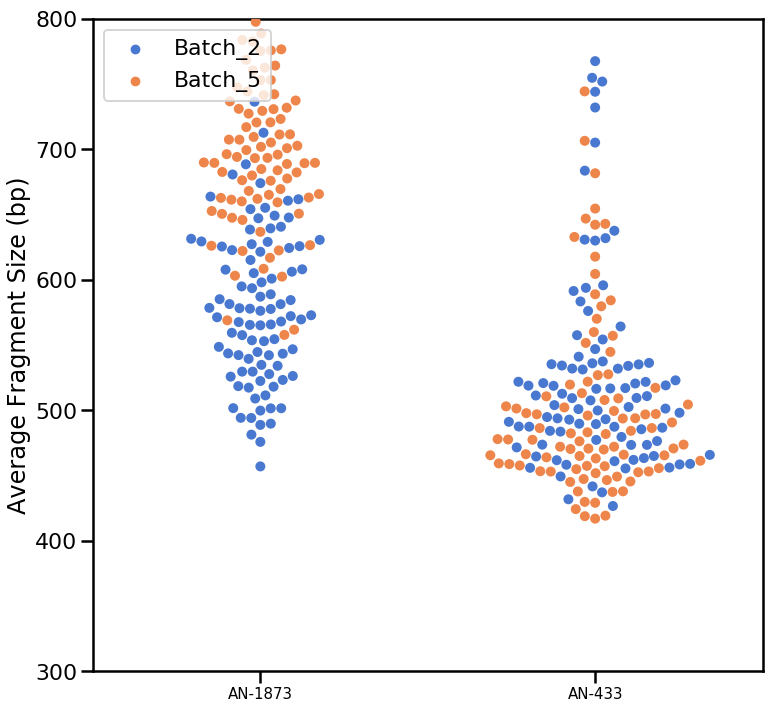

In [10]:
#### Swarm plot for plate 1 and 2
plt.figure(figsize=(12, 12))
sns.set_context("poster")
# sns.set(style="white", palette="muted")
ax = sns.swarmplot(x='sonicman', y='average_size', hue='plate', 
                   data=df_chart12, size=10, palette='muted')
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=0, fontsize=15)
ax.set(ylim=(300, 800))
ax.set_xlabel('')
ax.set_ylabel('Average Fragment Size (bp)')
plt.legend(loc='upper left')

plt.show()
plt.close()

# ax.figure.savefig("/Users/rchin/Downloads/Sonicman_PQ_Plate78_swarm_7.18.png", bbox_inches = 'tight')

Text(0.5, 1.0, 'AN-1873 Comparability')

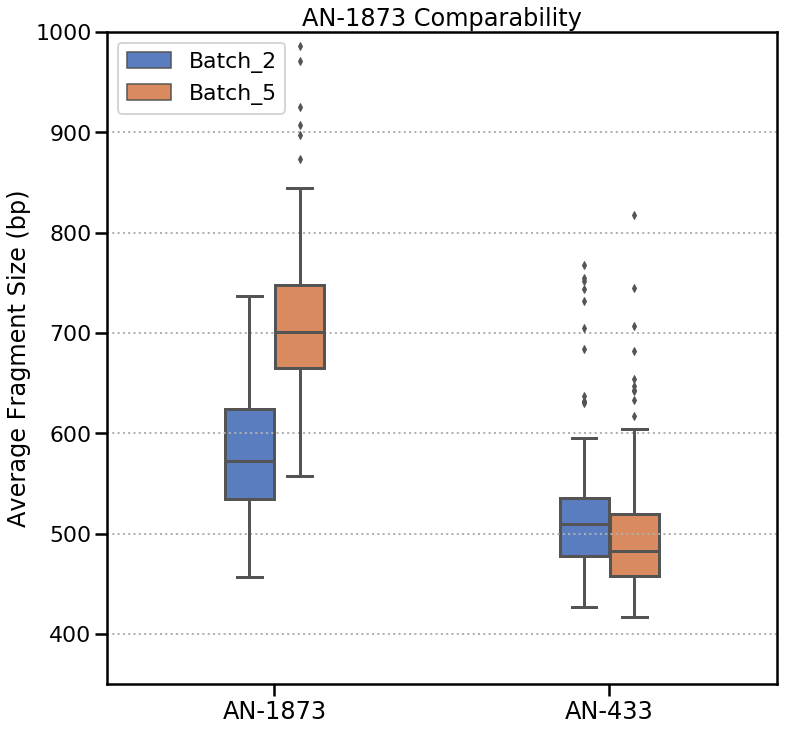

In [11]:
#box plot for plate 6
plt.figure(figsize=(12, 12))
sns.set_context("poster")
ax = sns.boxplot(x='sonicman', y='average_size', data=df_chart12,
#              'sonicman'    width=0.3)
                 width=0.3, hue='plate', palette='muted')
loc, labels = plt.xticks()
ax.set(ylim=(350, 1000))
ax.set_xticklabels(labels, rotation=0, fontsize=24)
ax.set_xlabel('')
ax.set_ylabel('Average Fragment Size (bp)')
plt.legend(loc='upper left')
plt.grid(linestyle='dotted', axis='y')
plt.title('AN-1873 Comparability')

# ax.figure.savefig("/Users/rchin/Downloads/Sonicman_PQ_Plate12_boxplot_10.7.png", bbox_inches = 'tight')

In [12]:
# #box plot for plate 5&6
# plt.figure(figsize=(12, 12))
# sns.set_context("poster")
# ax = sns.boxplot(x='sonicman', y='average_size', hue='plate', data=df56, width=0.3)
# loc, labels = plt.xticks()
# ax.set(ylim=(300, 800))
# ax.set_xticklabels(labels, rotation=0, fontsize=15)
# ax.set_xlabel('')
# ax.set_ylabel('Average Fragment Size (bp)')


In [13]:
# Check NTC controls for concentration > 5ng/ul
# df_ntc = df12.where(df12.sample_name=='NTC').dropna()

# already filtered NTCS in filter control function:
df_ntc12.head(20)

,plate,well,sample_name,User Comment,average_size,concentration,max_peak,350-1000_avg_size,sonicman
0,Batch_2,A01,A01,q1,659.347239,0.000000,448.979592,503.005919,AN-1873
6,Batch_2,A13,A07,q1,976.411868,0.028551,1070.707071,646.564017,AN-1873
84,Batch_2,O01,H01,q1,622.355938,0.039255,2702.702703,508.192180,AN-1873
96,Batch_2,A02,A01,q2,690.008535,0.009652,474.489796,503.232609,AN-433
102,Batch_2,A14,A07,q2,875.249932,0.034761,695.744681,594.968447,AN-433
180,Batch_2,O02,H01,q2,604.257810,0.044516,239.086294,524.165256,AN-433
192,Batch_5,A01,A01,q1,618.949193,2.422128,710.344828,600.071293,AN-1873
198,Batch_5,A13,A07,q1,687.621057,2.501407,742.352941,618.356230,AN-1873
276,Batch_5,O01,H01,q1,652.068858,2.548060,730.769231,611.083738,AN-1873
288,Batch_5,A02,A01,q2,478.598008,2.329626,588.181818,563.664085,AN-433


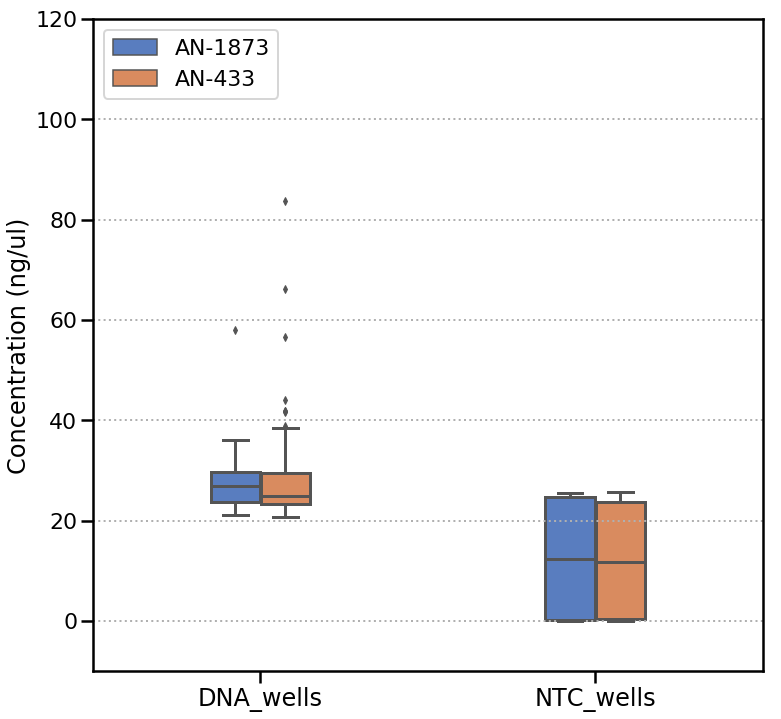

In [14]:
df_dna12 = df_chart12.copy()
df_dna12['ntc'] = 'DNA_wells'
df_ntc12['ntc'] = 'NTC_wells'
# df12_temp = df12_temp.assign(ntc=['NTC_wells' if x == 'NTC' else 'DNA_wells' for x in df12_temp['sample_name']])
# df12_temp = df12_temp[(df12_temp['concentration']<8)].dropna()
# df12_temp.drop(df12_temp[(df12_temp.ntc=='DNA_wells') & (df12_temp['concentration']<0.5)].index, inplace=True)
# ^ don't need since we filtered controls and created df_ntc12 dataframe already

df_ntc = pd.concat([df_dna12, df_ntc12], ignore_index=True)
df_ntc['conc'] = df_ntc['concentration']*10

#box plot for sample concentration
plt.figure(figsize=(12, 12))
sns.set_context("poster")
ax = sns.boxplot(x='ntc', y='conc', data=df_ntc,
#                  width=0.3)
                 width=0.3, hue='sonicman', palette='muted', order=['DNA_wells','NTC_wells'])
loc, labels = plt.xticks()
ax.set(ylim=(-10, 120))
ax.set_xticklabels(labels, rotation=0, fontsize=24)
ax.set_xlabel('')
ax.set_ylabel('Concentration (ng/ul)')
plt.legend(loc='upper left')
plt.grid(linestyle='dotted', axis='y')

# ax.figure.savefig("/Users/rchin/Downloads/Sonicman_PQ_Plate78_boxplot_7.31_NTC.png", bbox_inches = 'tight')

In [15]:
# print(stats.ttest_ind(df_stat12['average_size_'+new_AN], df_stat12['average_size_'+valid_AN]))
# print(stats.ttest_rel(df_stat12['average_size_'+new_AN], df_stat12['average_size_'+valid_AN]))

def variability(df):
    cv_new = stats.variation(df['average_size_'+new_AN])
    cv_valid= stats.variation(df['average_size_'+valid_AN])
    
    return cv_new, cv_valid

cv_new, cv_valid = variability(df_stat12)

print('cv_new:', cv_new)
print('cv_valid:', cv_valid)

cv_new: 0.15523741220255138
cv_valid: 0.16240998621554295


In [16]:
#Export stat table for report
report_col = ['sample_name', 'average_size_'+new_AN, 'average_size_'+valid_AN, 'pct_diff']
display(df_stat12[report_col].head())

# df_stat12[report_col].to_csv("/Users/rchin/Downloads/Sonicman_PQ_Plate78_report_stat.csv")

,sample_name,average_size_AN-1873,average_size_AN-433,pct_diff
0,A02,489.831306,518.823268,0.055880
1,A03,529.704907,520.599641,-0.017490
2,A04,527.819588,502.598768,-0.050181
3,A05,494.288771,518.969262,0.047557
4,A06,565.512254,498.162571,-0.135196


In [17]:
def generate_heatmap(df, title, coor_col_name, conc_col_name):
    fig, ax = plt.subplots(figsize=(24,8))
    df['col']=df[coor_col_name].map(lambda x: x[1:])
    df['row']=df[coor_col_name].map(lambda x: x[0])

    ff_pvt = pd.crosstab(index=df['row'],columns=df['col'],values=df[conc_col_name],aggfunc=sum)
    sns.heatmap(ff_pvt, annot=True, fmt='0.0f', vmin=400, vmax=800)
    plt.title(title)
    saveloc = '/Users/rchin/Downloads/' + title + '.png'
#     plt.savefig(saveloc, bbox_inches = 'tight')
#     return plt

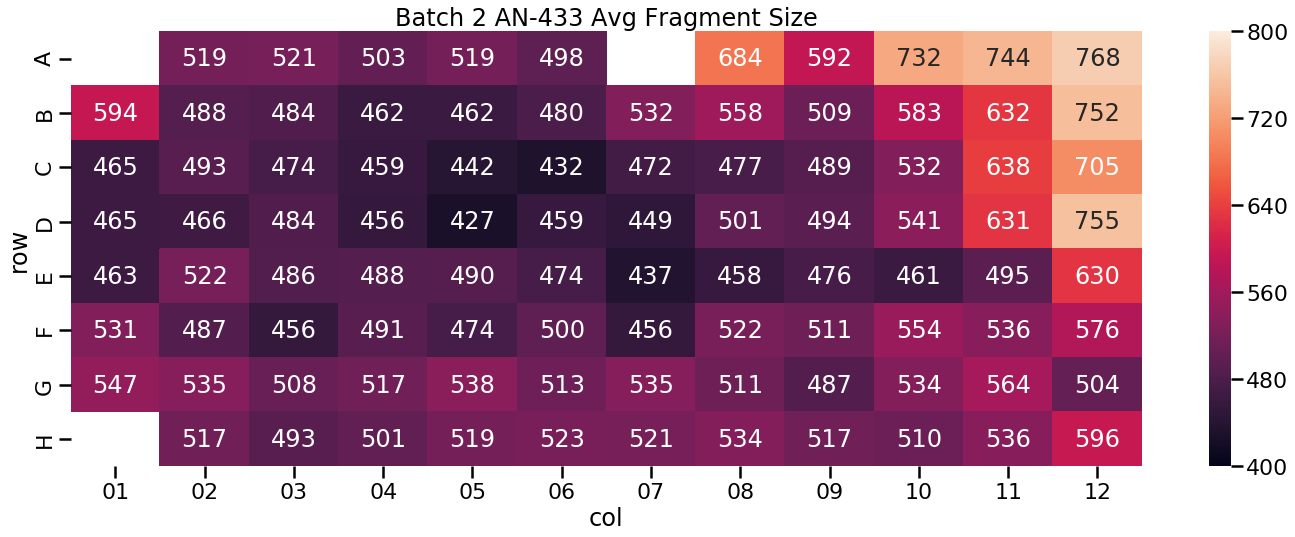

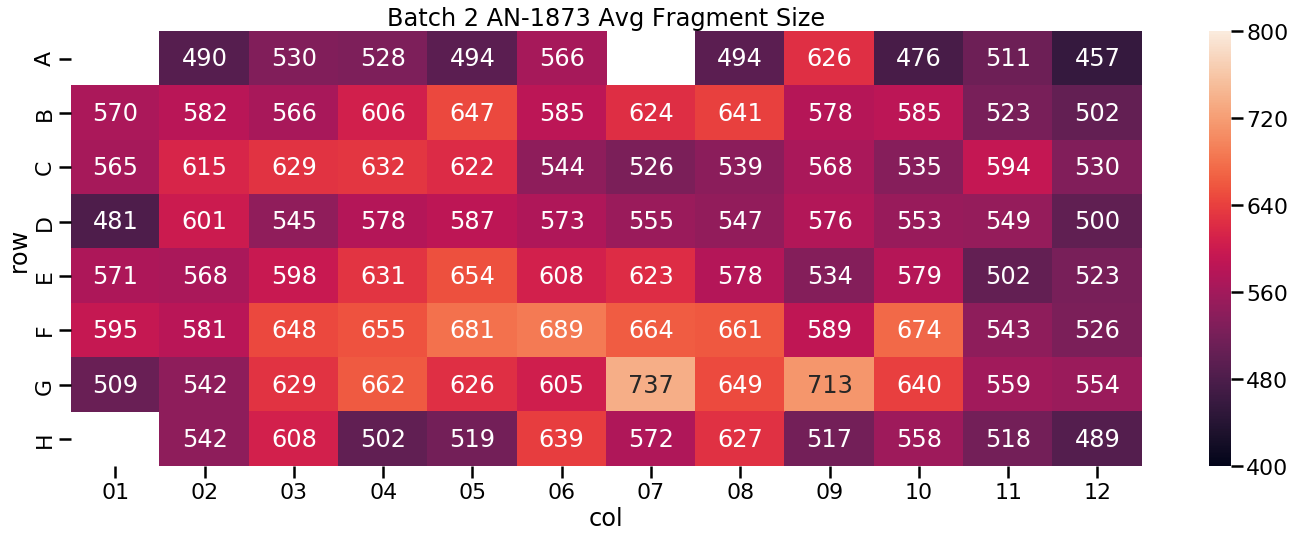

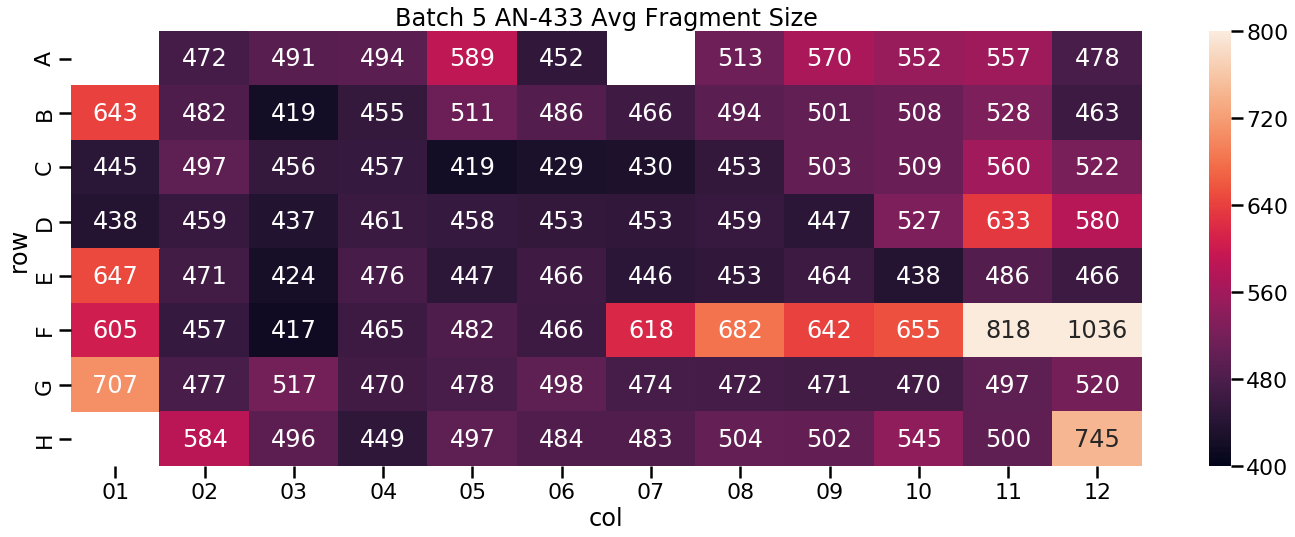

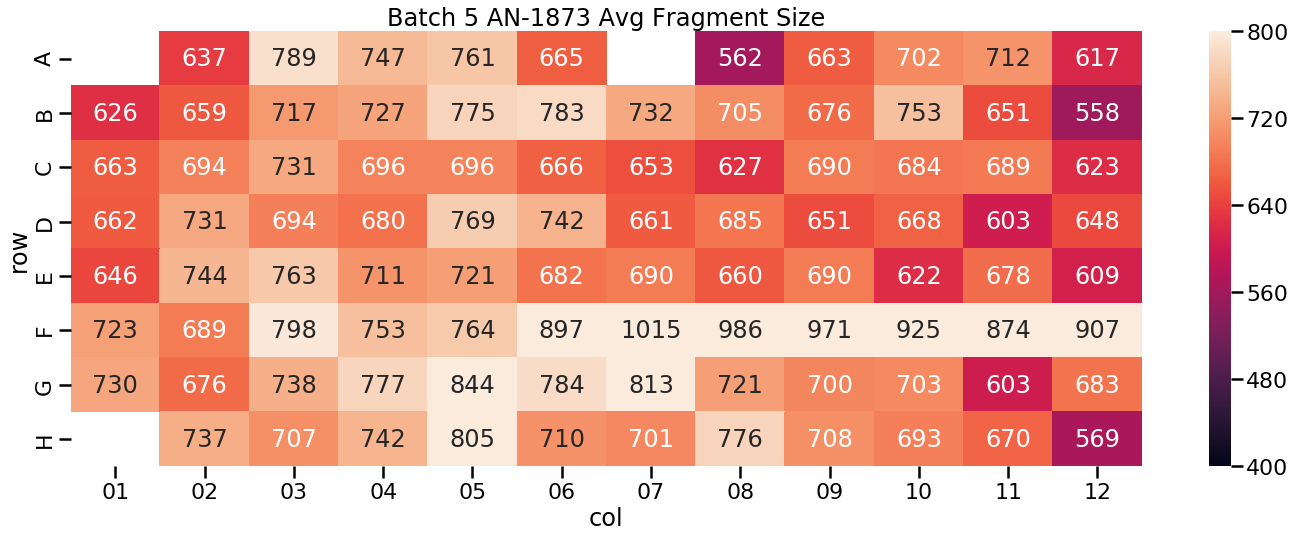

In [19]:
generate_heatmap(df_stat1, "Batch 2 AN-433 Avg Fragment Size", 'sample_name', 'average_size_AN-433')
generate_heatmap(df_stat1, "Batch 2 AN-1873 Avg Fragment Size", 'sample_name', 'average_size_AN-1873')
generate_heatmap(df_stat2, "Batch 5 AN-433 Avg Fragment Size", 'sample_name', 'average_size_AN-433')
generate_heatmap(df_stat2, "Batch 5 AN-1873 Avg Fragment Size", 'sample_name', 'average_size_AN-1873')